# CSE-CIC-IDS 2017 Classification with Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import glob

In [3]:
NOTEBOOK_PATH = "C:/Users/Xetrov/Desktop/SciFair20/Code/"

In [4]:
x_scaled = pd.read_csv(NOTEBOOK_PATH + "IDS2017/x_scaled_powertransform.csv")

In [5]:
y_df = pd.read_csv(NOTEBOOK_PATH + "IDS2017/y_all_binary.csv")

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [10]:
%%time
lda.fit(x_scaled, y_df)

C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(68, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\Xetrov\AppData\Local\Continuum\anacond

Wall time: 23.8 s


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [11]:
x_lda = lda.transform(x_scaled)

In [12]:
x_scaled.shape

(2830743, 68)

In [14]:
x_lda.shape

(2830743, 1)

In [15]:
np.unique(y_df)

array([0, 1], dtype=int64)

In [17]:
lda.explained_variance_ratio_

array([1.])

In [19]:
x_lda

array([[-0.84137474],
       [-1.31576092],
       [-1.1282248 ],
       ...,
       [-0.38576012],
       [-1.50857597],
       [-1.29482055]])

In [28]:
np.zeros_like(x_lda[:n,0])+1

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
x_lda[y_df['IsAttack'] == 1][n]

557646

In [30]:
x_lda[:n,0]

array([-0.84137474, -1.31576092, -1.1282248 , ..., -1.56280852,
       -0.27123531, -1.36578853])

No handles with labels found to put in legend.


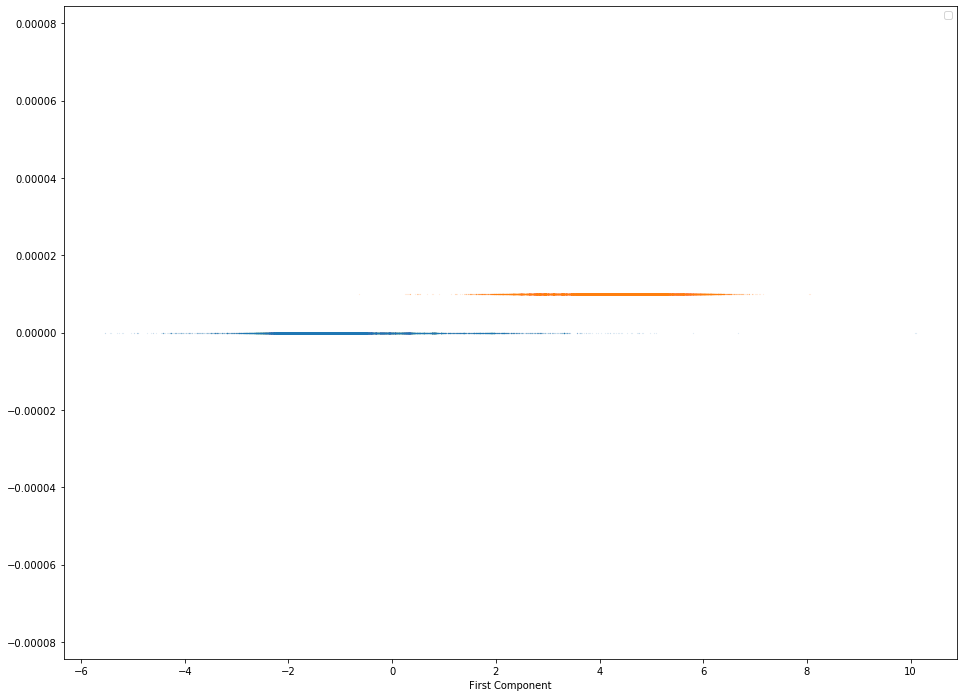

Wall time: 867 ms


In [38]:
%%time
n = 50000
plt.figure(figsize=(16,12))
plt.scatter(x_lda[y_df['IsAttack'] == 0][:n], np.zeros_like(x_lda[:n,0]), cmap='plasma', s=0.01, alpha=0.5)
plt.scatter(x_lda[y_df['IsAttack'] == 1][:n], np.zeros_like(x_lda[:n,0])+0.00001, cmap='plasma', s=0.01, alpha=0.5)
plt.legend()
plt.xlabel('First Component')
plt.show()

In [ ]:
lda.predict()